In [180]:
library(forestploter)
library(arrow)
library(dplyr)
library(stringr)
library(ggplot2)
library(cowplot)

In [75]:
df <- arrow::read_parquet('forestplot.parquet')

In [76]:
df <- df %>% select(label, group, r, ll, hl, `formatted_p-val`)

In [77]:
dd

In [77]:
names(df)[names(df) == "formatted_p-val"] <- "p-val"

In [160]:
# Create the new DataFrame
new_df <- do.call(rbind, lapply(split(df, df$group), function(group_df) {
  # Extract the group name
  group_name <- unique(group_df$group)
  
  # Dynamically create a row with column names from df
  group_row <- as.data.frame(
    matrix(NA, nrow = 1, ncol = ncol(df)),  # Create a row with NA values
    stringsAsFactors = FALSE
  )
  colnames(group_row) <- names(df)         # Assign column names dynamically
  group_row$label <- group_name            # Set the label as the group name
  group_row$group <- group_name            # Set the group as the group name
  
  # Arrange rows: group row, non-sCr row, then sCr row
  non_sCr_row <- group_df[group_df$label != "sCr", ]
  sCr_row <- group_df[group_df$label == "sCr", ]

# Add spaces to the beginning of the label for non_sCr_row and sCr_row
  non_sCr_row$label <- paste0("      ", non_sCr_row$label)
  sCr_row$label <- paste0("      ", sCr_row$label)
    
  # Combine rows in the desired order
  rbind(group_row, non_sCr_row, sCr_row)
}))

# Reset row names
rownames(new_df) <- NULL

In [172]:
new_df$`p-val`[is.na(new_df$`p-val`)] <- ""
new_df$'                         ' <- ""     
new_df$`HR (95% CI)` <- ifelse(
  is.na(new_df$r),
  "", # Use empty string if r is NA
  sprintf("%.2f (%.2f–%.2f)", round(new_df$r, 2), round(new_df$ll, 2), round(new_df$hl, 2))
)

In [175]:
df_arbs <- subset(
  new_df,
  group %in% c(
    'Renin-inhibitors(LNa):C09XA',
    'Vasopressin antagonists(LNa):C03XA'
  )
)

# Subset for the remaining rows
df_others <- subset(
  new_df,
  !group %in% c(
    'Renin-inhibitors(LNa):C09XA',
    'Vasopressin antagonists(LNa):C03XA'
  )
)

df_arbs <- df_arbs[, !(names(df_arbs) %in% "group")]
df_others <- df_others[, !(names(df_others) %in% "group")]

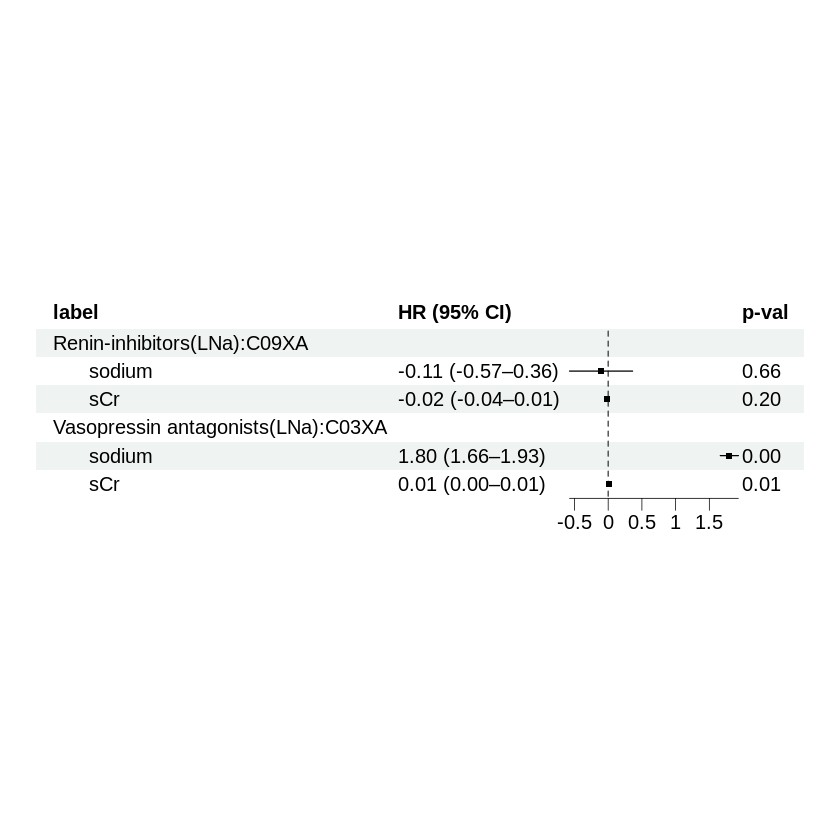

In [192]:
# Set up the forest plot
plot <- forest(
  data = df_arbs[,c(1, 7, 6, 5)],
  est = df_arbs$r,
  lower = df_arbs$ll,
  upper = df_arbs$hl,
  ci_column = 3, # Use the third column for CIs
  ci_label = "CI (95%)",
  study_label = "label",
  x_label = "Effect Size",
  show_ci = TRUE,
  width = c(0.4, 0.2)    
)
# Print the plot
print(plot)
#plot<-plot + theme(plot.margin=unit(c(0,0,0,0),"mm"))
ggsave(file="intercept_forest2.svg", plot=plot, width = 7.5, height = 2, units = "in")

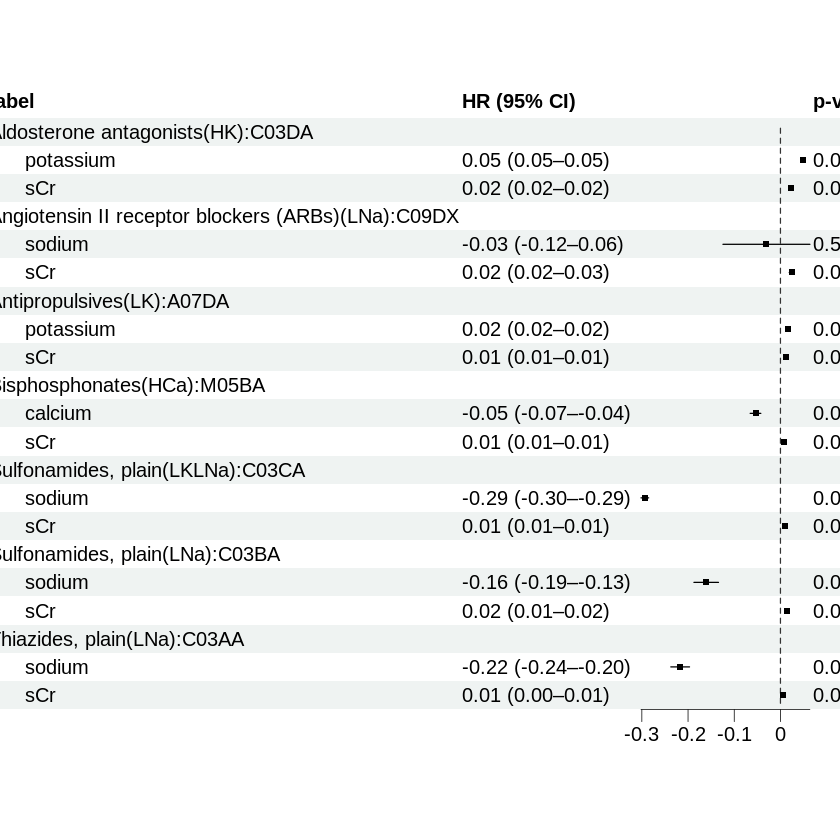

In [200]:
# Set up the forest plot
plot <- forest(
  data = df_others[,c(1, 7, 6, 5)],
  est = df_others$r,
  lower = df_others$ll,
  upper = df_others$hl,
  ci_column = 3, # Use the third column for CIs
  ci_label = "CI (95%)",
  study_label = "label",
  x_label = "Effect Size",
  show_ci = TRUE,
  width = c(0.4, 0.2)    
)
# Print the plot
print(plot)
ggsave(file="intercept_forest1.svg", plot=plot, width = 8.5, height = 6, units = "in")